In [1]:
import bs4, waybackpy, requests, pytz, html2csv
import script, jynneos, helpers

In [2]:
data = script.scrape_waybackpy()

In [5]:
import json
open("/Users/jlumbroso/Downloads/jynneos.json", "w").write(json.dumps(data, indent=2))

16787

In [6]:
jynneos.fetch_jynneos_table_near(2022, 7, 1)

{'All': {'Total distribution': 41520},
 'Alaska': {'Total distribution': 20},
 'Arizona': {'Total distribution': 118},
 'California': {'Total distribution': 12156},
 'Chicago': {'Total distribution': 5409},
 'Colorado': {'Total distribution': 1340},
 'Connecticut': {'Total distribution': 10},
 'Delaware': {'Total distribution': 16},
 'District of Columbia': {'Total distribution': 1706},
 'Florida': {'Total distribution': 503},
 'Georgia': {'Total distribution': 238},
 'Hawaii': {'Total distribution': 557},
 'Illinois': {'Total distribution': 126},
 'Indiana': {'Total distribution': 520},
 'Iowa': {'Total distribution': 26},
 'Kentucky': {'Total distribution': 70},
 'Los Angeles': {'Total distribution': 7346},
 'Louisiana': {'Total distribution': 20},
 'Maine': {'Total distribution': 40},
 'Maryland': {'Total distribution': 158},
 'Massachusetts': {'Total distribution': 2204},
 'Michigan': {'Total distribution': 24},
 'Minnesota': {'Total distribution': 40},
 'Mississippi': {'Total dist

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import datetime

def convert_dict(d):
    return {
        datetime.datetime.strptime(k, "%Y-%m-%d"): v
        for k, v in d.items()
    }

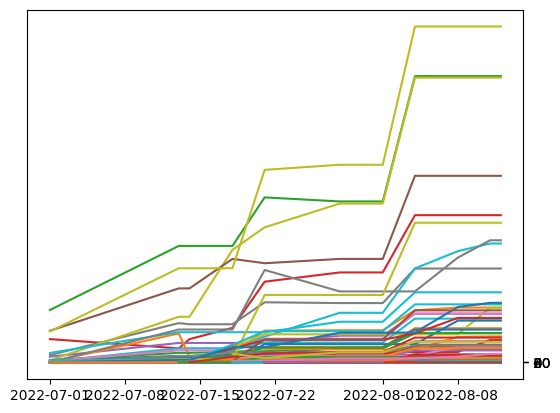

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import datetime

def convert_dict(d):
    return {
        datetime.datetime.strptime(k, "%Y-%m-%d"): v
        for k, v in d.items()
    }

f = plt.figure()
ax = f.add_subplot(111)
ax.yaxis.tick_right()
for key in data.keys():
    if key != "All":
        plt.plot(convert_dict(data[key]).keys(), convert_dict(data[key]).values(), label=key)

In [ ]:
import helpers
import jynneos

In [12]:
start = (2022, 7, 1)
year, month, day = start
prev_data = None

data = dict()

KEY = "Jurisdiction"

while not helpers.in_future(year, month, day):
    new_data = jynneos.fetch_jynneos_table_near(year, month, day)

    if prev_data is None or [i for i in new_data if i not in prev_data or new_data[i] != prev_data[i]] != []:
        for data_key, data_entry in new_data.items():
            if data_key.strip() == "":
                continue
            for key, value in data_entry.items():
                data[data_key] = data.get(data_key, dict())
                data[data_key]["{} ({}-{:02}-{:02})".format(key, year, month, day)] = value
    
    year, month, day = helpers.next_day(year, month, day)
    prev_data = new_data
    

In [4]:
start = (2022, 7, 1)
year, month, day = start
prev_data = None

data = dict()

KEY = "Jurisdiction"

while not helpers.in_future(year, month, day):
    new_data = jynneos.fetch_jynneos_table_near(year, month, day)

    if prev_data is None or [i for i in new_data if i not in prev_data] != []:
        for data_entry in new_data:
            data_key = data_entry.get(KEY, "")
            if data_key.strip() == "":
                continue
            for key, value in data_entry.items():
                data[data_key] = data.get(data_key, dict())
                data[data_key]["{} ({}-{:02}-{:02})".format(key, year, month, day)] = value
    
    year, month, day = helpers.next_day(year, month, day)
    prev_data = new_data
    

In [5]:
data["All"]

{'Jurisdiction (2022-07-01)': 'All',
 'Total distribution (2022-07-01)': 41520,
 'Jurisdiction (2022-07-13)': 'All',
 'Total distribution (2022-07-13)': 135573,
 'Jurisdiction (2022-07-14)': 'All',
 'Total distribution (2022-07-14)': 132074,
 'Jurisdiction (2022-07-18)': 'All',
 'Total distribution (2022-07-18)': 191372,
 'Jurisdiction (2022-07-21)': 'All',
 'Total allocation (2022-07-21)': 333218,
 'Total requested (2022-07-21)': 321615,
 'Total shipped (2022-07-21)': 310385,
 'Jurisdiction (2022-07-28)': 'All',
 'Allocation 2022-07-29 to onwards (2022-07-28)': 736620,
 'Allocation 2022-06-28 to 2022-07-27 (2022-07-28)': 333218,
 'Total allocation (2022-07-28)': 1069838,
 'Total shipped as of 2022-07-27 (2022-07-28)': 336710,
 'Total requested (2022-07-28)': 337016,
 'Jurisdiction (2022-08-01)': 'All',
 'Allocation 2022-07-29 to onwards (2022-08-01)': 736620,
 'Allocation 2022-06-28 to 2022-07-27 (2022-08-01)': 333218,
 'Total allocation (2022-08-01)': 1069838,
 'Total shipped as of 2

In [14]:
post_process_jynneos_longitudinal_data(data)

{'All': {'2022-07-01': 41520,
  '2022-07-13': 135573,
  '2022-07-14': 132074,
  '2022-07-18': 191372,
  '2022-07-21': 310385,
  '2022-07-28': 336710,
  '2022-08-01': 336710,
  '2022-08-05': 580733,
  '2022-08-08': 617693,
  '2022-08-11': 634213,
  '2022-08-12': 634213},
 'Alaska': {'2022-07-01': 20,
  '2022-07-13': 102,
  '2022-07-14': 102,
  '2022-07-18': 102,
  '2022-07-21': 102,
  '2022-07-28': 102,
  '2022-08-01': 102,
  '2022-08-05': 340,
  '2022-08-08': 340,
  '2022-08-11': 340,
  '2022-08-12': 340},
 'Arizona': {'2022-07-01': 118,
  '2022-07-13': 457,
  '2022-07-14': 457,
  '2022-07-18': 2109,
  '2022-07-21': 3613,
  '2022-07-28': 3613,
  '2022-08-01': 3613,
  '2022-08-05': 7933,
  '2022-08-08': 7933,
  '2022-08-11': 7933,
  '2022-08-12': 7933},
 'California': {'2022-07-01': 12156,
  '2022-07-13': 26990,
  '2022-07-14': 26990,
  '2022-07-18': 26990,
  '2022-07-21': 38229,
  '2022-07-28': 37289,
  '2022-08-01': 37289,
  '2022-08-05': 66309,
  '2022-08-08': 66309,
  '2022-08-11': 

In [13]:
def post_process_jynneos_longitudinal_data(table_data):
    def clean_key(key):
        tokens = key.split("(", 1)
        if len(tokens) != 2:
            return key

        ts = tokens[1].strip(" ()")
        year, month, day = ts.split("-")

        return ts

    cleaned_table_data = {
        rowkey: {
            clean_key(key): value
            for key, value in rowdata.items()
            if "total" in key.lower()
            and (
                "deployed" in key.lower()
                or "shipped" in key.lower()
                or "distribution" in key.lower()
            )
        }
        for rowkey, rowdata in table_data.items()
    }

    return cleaned_table_data

In [13]:
data["All"]

{'Total distribution (2022-07-01)': 41520,
 'Total distribution (2022-07-13)': 135573,
 'Total distribution (2022-07-14)': 132074,
 'Total distribution (2022-07-18)': 191372,
 'Total shipped (2022-07-21)': 310385,
 'Total shipped as of 2022-07-27 (2022-07-28)': 336710,
 'Total shipped as of 2022-08-03 (2022-08-05)': 580733,
 'Total shipped as of 2022-08-08 (2022-08-08)': 617693,
 'Total shipped as of 2022-08-10 (2022-08-11)': 634213,
 'Total shipped as of 2022-08-12 (2022-08-12)': 634213}

In [14]:
def clean_key(key):
    tokens = key.split("(", 1)
    if len(tokens) != 2:
        return key
    
    ts = tokens[1].strip(" ()")
    year, month, day = ts.split("-")

    return ts

{
    rowkey: {
        clean_key(key): value
        for key, value in rowdata.items()
        if "total" in key.lower() and (
            "deployed" in key.lower() or "shipped" in key.lower() or "distribution" in key.lower()
        )

    }
    for rowkey, rowdata in data.items()
}

{'All': {'2022-07-01': 41520,
  '2022-07-13': 135573,
  '2022-07-14': 132074,
  '2022-07-18': 191372,
  '2022-07-21': 310385,
  '2022-07-28': 336710,
  '2022-08-05': 580733,
  '2022-08-08': 617693,
  '2022-08-11': 634213,
  '2022-08-12': 634213},
 'Alaska': {'2022-07-01': 20,
  '2022-07-13': 102,
  '2022-07-14': 102,
  '2022-07-18': 102,
  '2022-07-21': 102,
  '2022-07-28': 102,
  '2022-08-05': 340,
  '2022-08-08': 340,
  '2022-08-11': 340,
  '2022-08-12': 340},
 'Arizona': {'2022-07-01': 118,
  '2022-07-13': 457,
  '2022-07-14': 457,
  '2022-07-18': 2109,
  '2022-07-21': 3613,
  '2022-07-28': 3613,
  '2022-08-05': 7933,
  '2022-08-08': 7933,
  '2022-08-11': 7933,
  '2022-08-12': 7933},
 'California': {'2022-07-01': 12156,
  '2022-07-13': 26990,
  '2022-07-14': 26990,
  '2022-07-18': 26990,
  '2022-07-21': 38229,
  '2022-07-28': 37289,
  '2022-08-05': 66309,
  '2022-08-08': 66309,
  '2022-08-11': 66309,
  '2022-08-12': 66309},
 'Chicago': {'2022-07-01': 5409,
  '2022-07-13': 3269,
  '2

In [19]:
data["New Jersey"]

{'All': {'Total distribution (2022-07-01)': 41520,
  'Total distribution (2022-07-13)': 135573,
  'Total distribution (2022-07-14)': 132074,
  'Total distribution (2022-07-18)': 191372,
  'Total shipped (2022-07-21)': 310385,
  'Total shipped (2022-07-27)': 310385,
  'Total shipped as of 2022-07-27 (2022-07-28)': 336710,
  'Total shipped as of 2022-08-03 (2022-08-05)': 580733},
 'Alaska': {'Total distribution (2022-07-01)': 20,
  'Total distribution (2022-07-13)': 102,
  'Total distribution (2022-07-14)': 102,
  'Total distribution (2022-07-18)': 102,
  'Total shipped (2022-07-21)': 102,
  'Total shipped (2022-07-27)': 102,
  'Total shipped as of 2022-07-27 (2022-07-28)': 102,
  'Total shipped as of 2022-08-03 (2022-08-05)': 340},
 'Arizona': {'Total distribution (2022-07-01)': 118,
  'Total distribution (2022-07-13)': 457,
  'Total distribution (2022-07-14)': 457,
  'Total distribution (2022-07-18)': 2109,
  'Total shipped (2022-07-21)': 3613,
  'Total shipped (2022-07-27)': 3613,
  '

In [14]:
jynneos.fetch_jynneos_table_near(2022, 7, 31)

{'All': {'Total shipped as of 2022-07-27': 336710},
 'Alabama': {'Total shipped as of 2022-07-27': 1283},
 'Alaska': {'Total shipped as of 2022-07-27': 102},
 'Arizona': {'Total shipped as of 2022-07-27': 3613},
 'Arkansas': {'Total shipped as of 2022-07-27': 100},
 'California - Los Angeles': {'Total shipped as of 2022-07-27': 23982},
 'California - Other': {'Total shipped as of 2022-07-27': 37289},
 'Colorado': {'Total shipped as of 2022-07-27': 6205},
 'Connecticut': {'Total shipped as of 2022-07-27': 1808},
 'Delaware': {'Total shipped as of 2022-07-27': 415},
 'District of Columbia': {'Total shipped as of 2022-07-27': 13755},
 'Florida': {'Total shipped as of 2022-07-27': 36800},
 'Georgia': {'Total shipped as of 2022-07-27': 11505},
 'Hawaii': {'Total shipped as of 2022-07-27': 1512},
 'Idaho': {'Total shipped as of 2022-07-27': 440},
 'Illinois - Chicago': {'Total shipped as of 2022-07-27': 20849},
 'Illinois - Other': {'Total shipped as of 2022-07-27': 7458},
 'Indiana': {'Tota

In [28]:
for all in sorted(data.keys()):
    all = all.replace("\u200b", "")
    print('"{}": "{}",'.format(all, all))

"": "",
"Alabama": "Alabama",
"Alaska": "Alaska",
"All": "All",
"American Samoa": "American Samoa",
"Arizona": "Arizona",
"Arkansas": "Arkansas",
"Arkansas": "Arkansas",
"California": "California",
"California - Los Angeles": "California - Los Angeles",
"California - Other": "California - Other",
"Chicago": "Chicago",
"Colorado": "Colorado",
"Connecticut": "Connecticut",
"Connecticut": "Connecticut",
"Delaware": "Delaware",
"District of Columbia": "District of Columbia",
"Florida": "Florida",
"Georgia": "Georgia",
"Guam": "Guam",
"Hawaii": "Hawaii",
"Houston": "Houston",
"Idaho": "Idaho",
"Illinois": "Illinois",
"Illinois - Chicago": "Illinois - Chicago",
"Illinois - Other": "Illinois - Other",
"Indiana": "Indiana",
"Iowa": "Iowa",
"Kansas": "Kansas",
"Kentucky": "Kentucky",
"Los Angeles": "Los Angeles",
"Louisiana": "Louisiana",
"Maine": "Maine",
"Mariana Islands": "Mariana Islands",
"Maryland": "Maryland",
"Massachusetts": "Massachusetts",
"Michigan": "Michigan",
"Minnesota": "Minnes

In [13]:
prev_data

{'All': {'Total shipped as of 2022-08-12': 634213},
 'Alabama': {'Total shipped as of 2022-08-12': 1283},
 'Alaska': {'Total shipped as of 2022-08-12': 340},
 'American Samoa': {'Total shipped as of 2022-08-12': 20},
 'Arizona': {'Total shipped as of 2022-08-12': 7933},
 'Arkansas': {'Total shipped as of 2022-08-12': 1760},
 'California': {'Total shipped as of 2022-08-12': 66309},
 'California - Los Angeles': {'Total shipped as of 2022-08-12': 43222},
 'Colorado': {'Total shipped as of 2022-08-12': 11285},
 'Connecticut': {'Total shipped as of 2022-08-12': 3628},
 'Delaware': {'Total shipped as of 2022-08-12': 995},
 'District of Columbia': {'Total shipped as of 2022-08-12': 21755},
 'Florida': {'Total shipped as of 2022-08-12': 65960},
 'Georgia': {'Total shipped as of 2022-08-12': 27542},
 'Guam': {'Total shipped as of 2022-08-12': 60},
 'Hawaii': {'Total shipped as of 2022-08-12': 2872},
 'Idaho': {'Total shipped as of 2022-08-12': 1000},
 'Illinois': {'Total shipped as of 2022-08-1